## Final Project Submission

Please fill out:
* Student name: Hiten Patel 
* Student pace: full time
* Scheduled project review date/time: September 14th: 11AM
* Instructor name: James Irving 
* Blog post URL:
https://hpatel530.github.io/blog_number_3_by_hiten_patel


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Introduction 

# OBTAIN
>**Importing libraies/packages**

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

>**Importing and previewing data**

In [90]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
print (df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB


## Inspecting the Columns 

>**Inspecting the Column's Data Type**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

>**Inspecting Column's Unique Values**

In [92]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

>**Checking for Null Values** 

In [93]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
waterfront,0.110015
view,0.002917
yr_renovated,0.177895


>**Replace Null Values in 'waterfront, 'view' and 'yr_renovated'**

In [94]:
#Inspecting 'waterfront' column and replacing Null values with the median value 
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())

2
[nan  0.  1.]
0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [95]:
#Inspecting 'views' column and replacing Null values with the median value 
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

df['view'] = df['view'].fillna(df['view'].median())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [96]:
#Inspecting 'yr_renovated' column and replacing Null values with the median value 
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())
print(df['yr_renovated'].value_counts())

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [97]:
#Confirm changes to dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>**Replacing '?' in 'sqft_basement'**

In [98]:
df.sqft_basement = df.sqft_basement.map(lambda x: x.replace('?', "0"))


In [99]:
#Confirm changes 
print(df['sqft_basement'].value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
875.0         1
2490.0        1
243.0         1
784.0         1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64


## Visually Examining Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b08c4f5f8>,
      dtype=object)

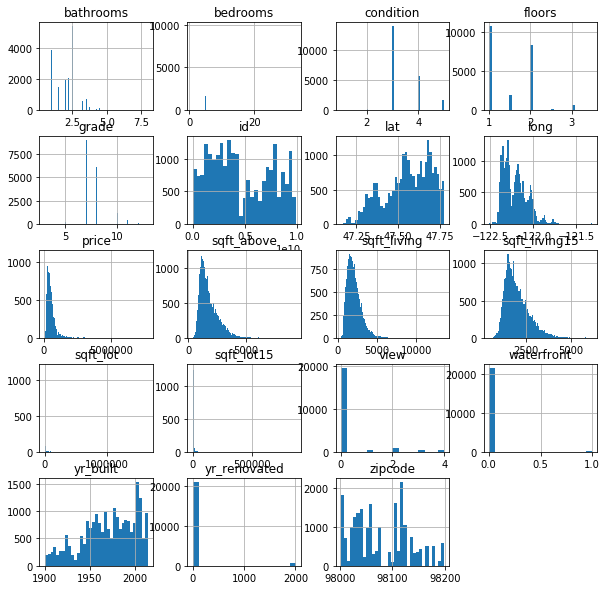

In [13]:
df.hist(bins='auto', figsize=(10,10))

In [100]:
def joint_plots(df, col, target='price'):
    """Created function to plot each feature vs target variable"""
    plots = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f'{col} vs {target}')
    return plots

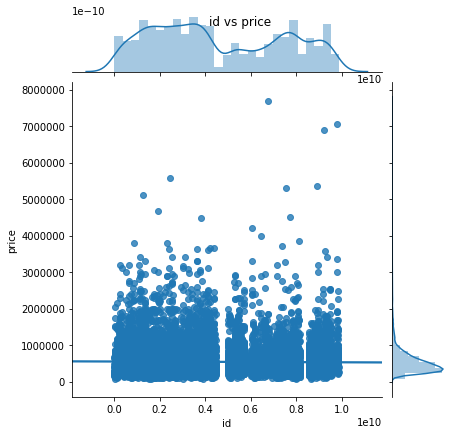

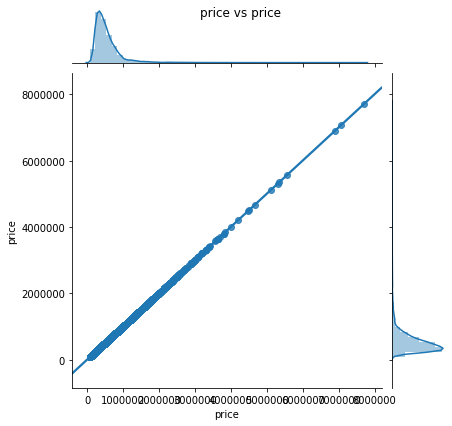

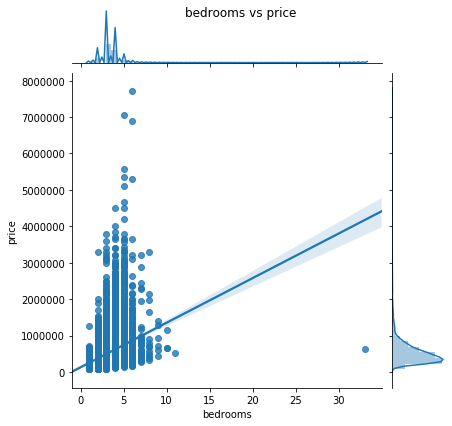

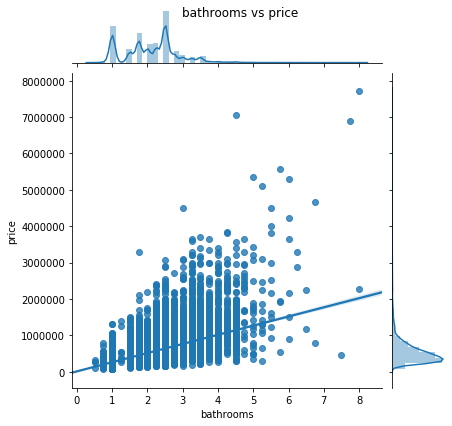

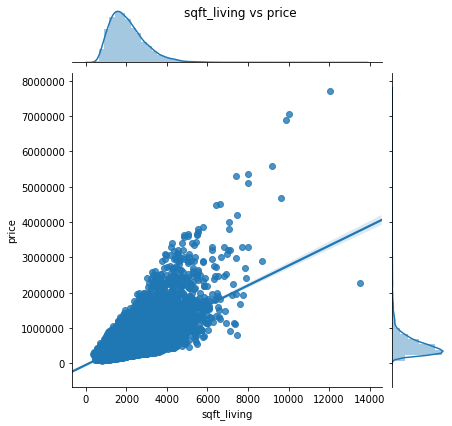

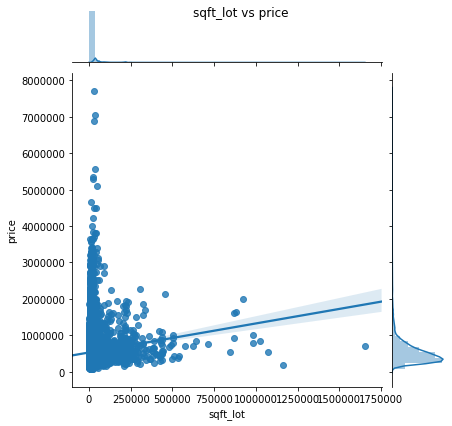

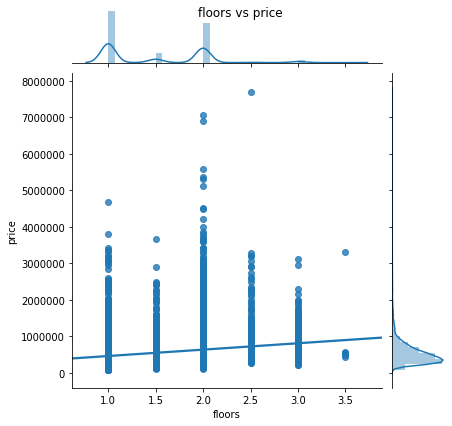

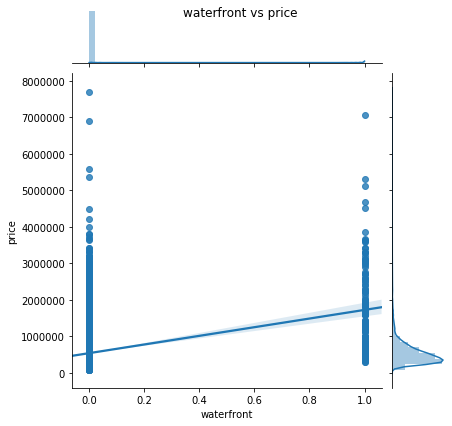

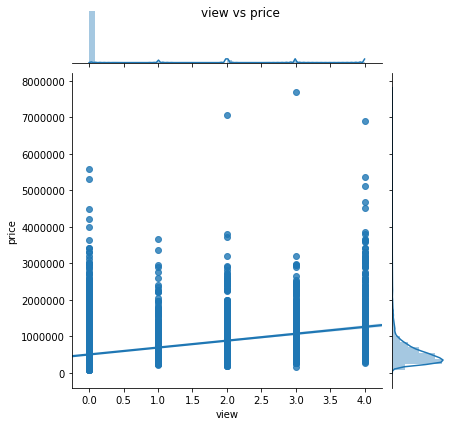

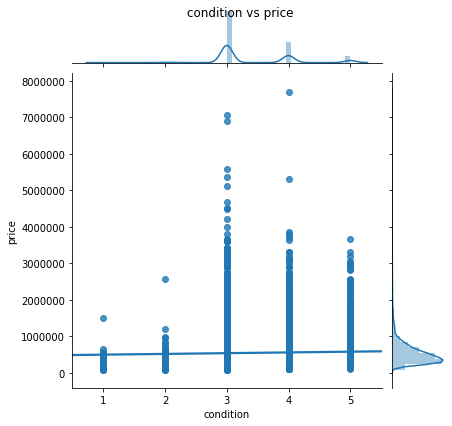

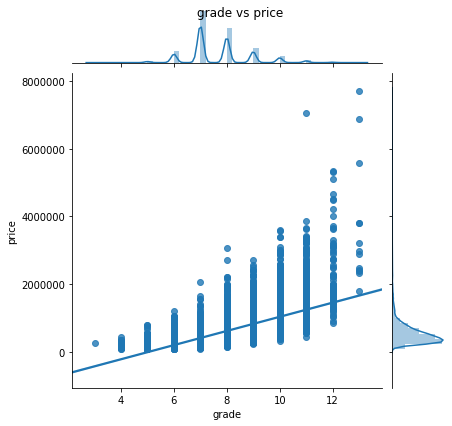

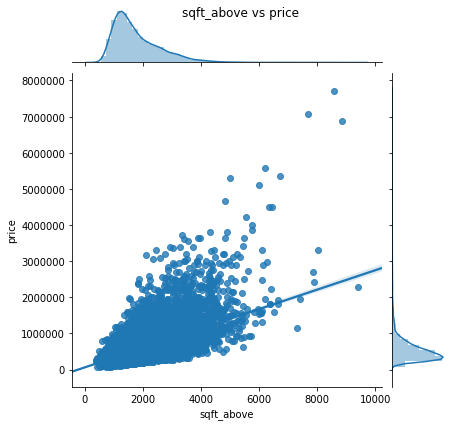

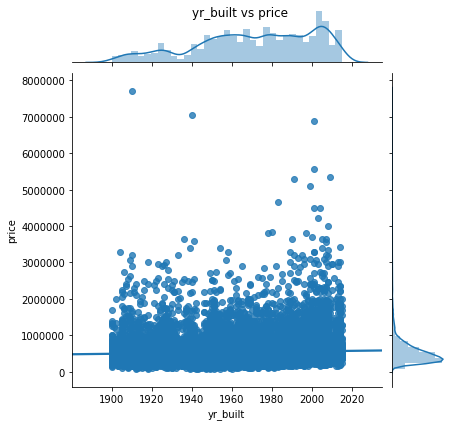

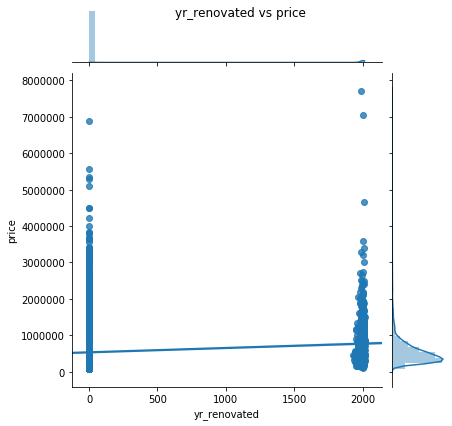

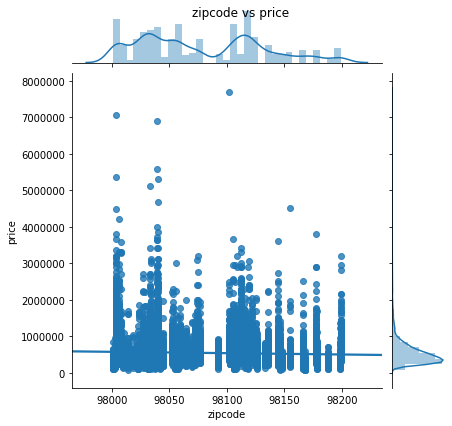

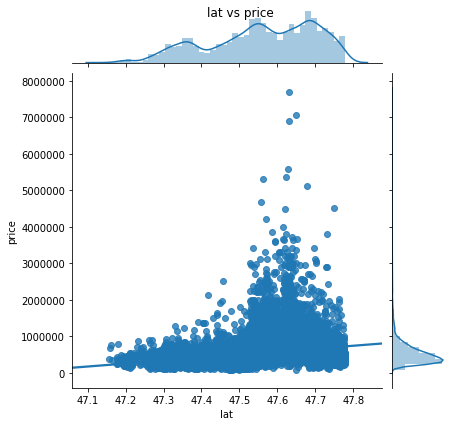

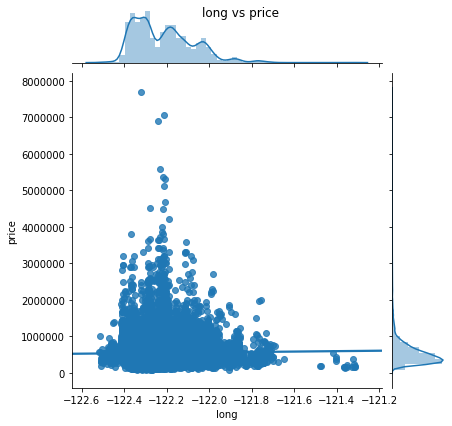

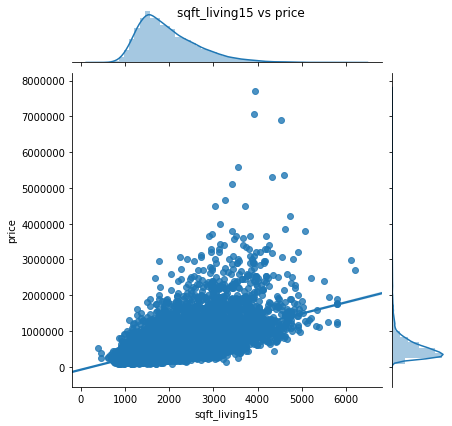

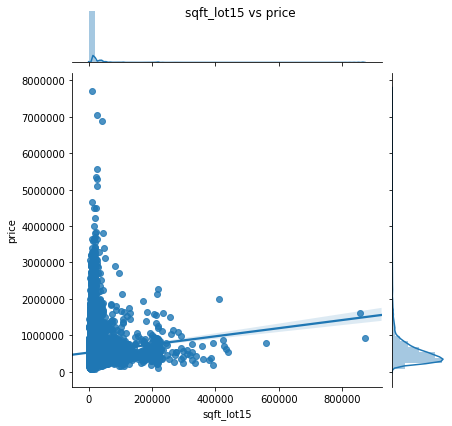

In [15]:
num_cols = list(df.select_dtypes('number').columns)
for col in num_cols: 
    joint_plots(df, col)

>**Observations:**
>* bedrooms has a linear relationship, and vertical stacking - categorical data

>* bathrooms has a linear relationship, and vertical stacking - categorical data

>* sqft_living has a linear relationship, contains outliers, skewed right

>* sqft_lot has a slight linear relationship,contains outliers, skewed right

>* floors slight linear relationship, and vertical stacking - categorical data

>* waterfront slight linear relationship, and vertical stacking - categorical data

>* view slight linear relationship, and vertical stacking - categorical data

>* condition has no linear relationship - vertical stacking - categorical data 

>* grade slight linear relationship, and vertical stacking - categorical data

>* sqft_above has a linear relationship, contains outliers, skewed right

>* yr_built slight linear relationship - possible categorical variables  

>* yr_renovated slight linear relationship - vertical stacking - categorical data 

>* zipcode no linear relationship, vertical stacking - possible categorical variable 

>* lat very little linear relationship
* long has no linear relationship 

>* sqft_living15 has a linear relationship, contains outliers, skewed right

>* sqft_lot15 slight linear relationship, contains outliers, skewed right

## Multicolinearity Analysis 

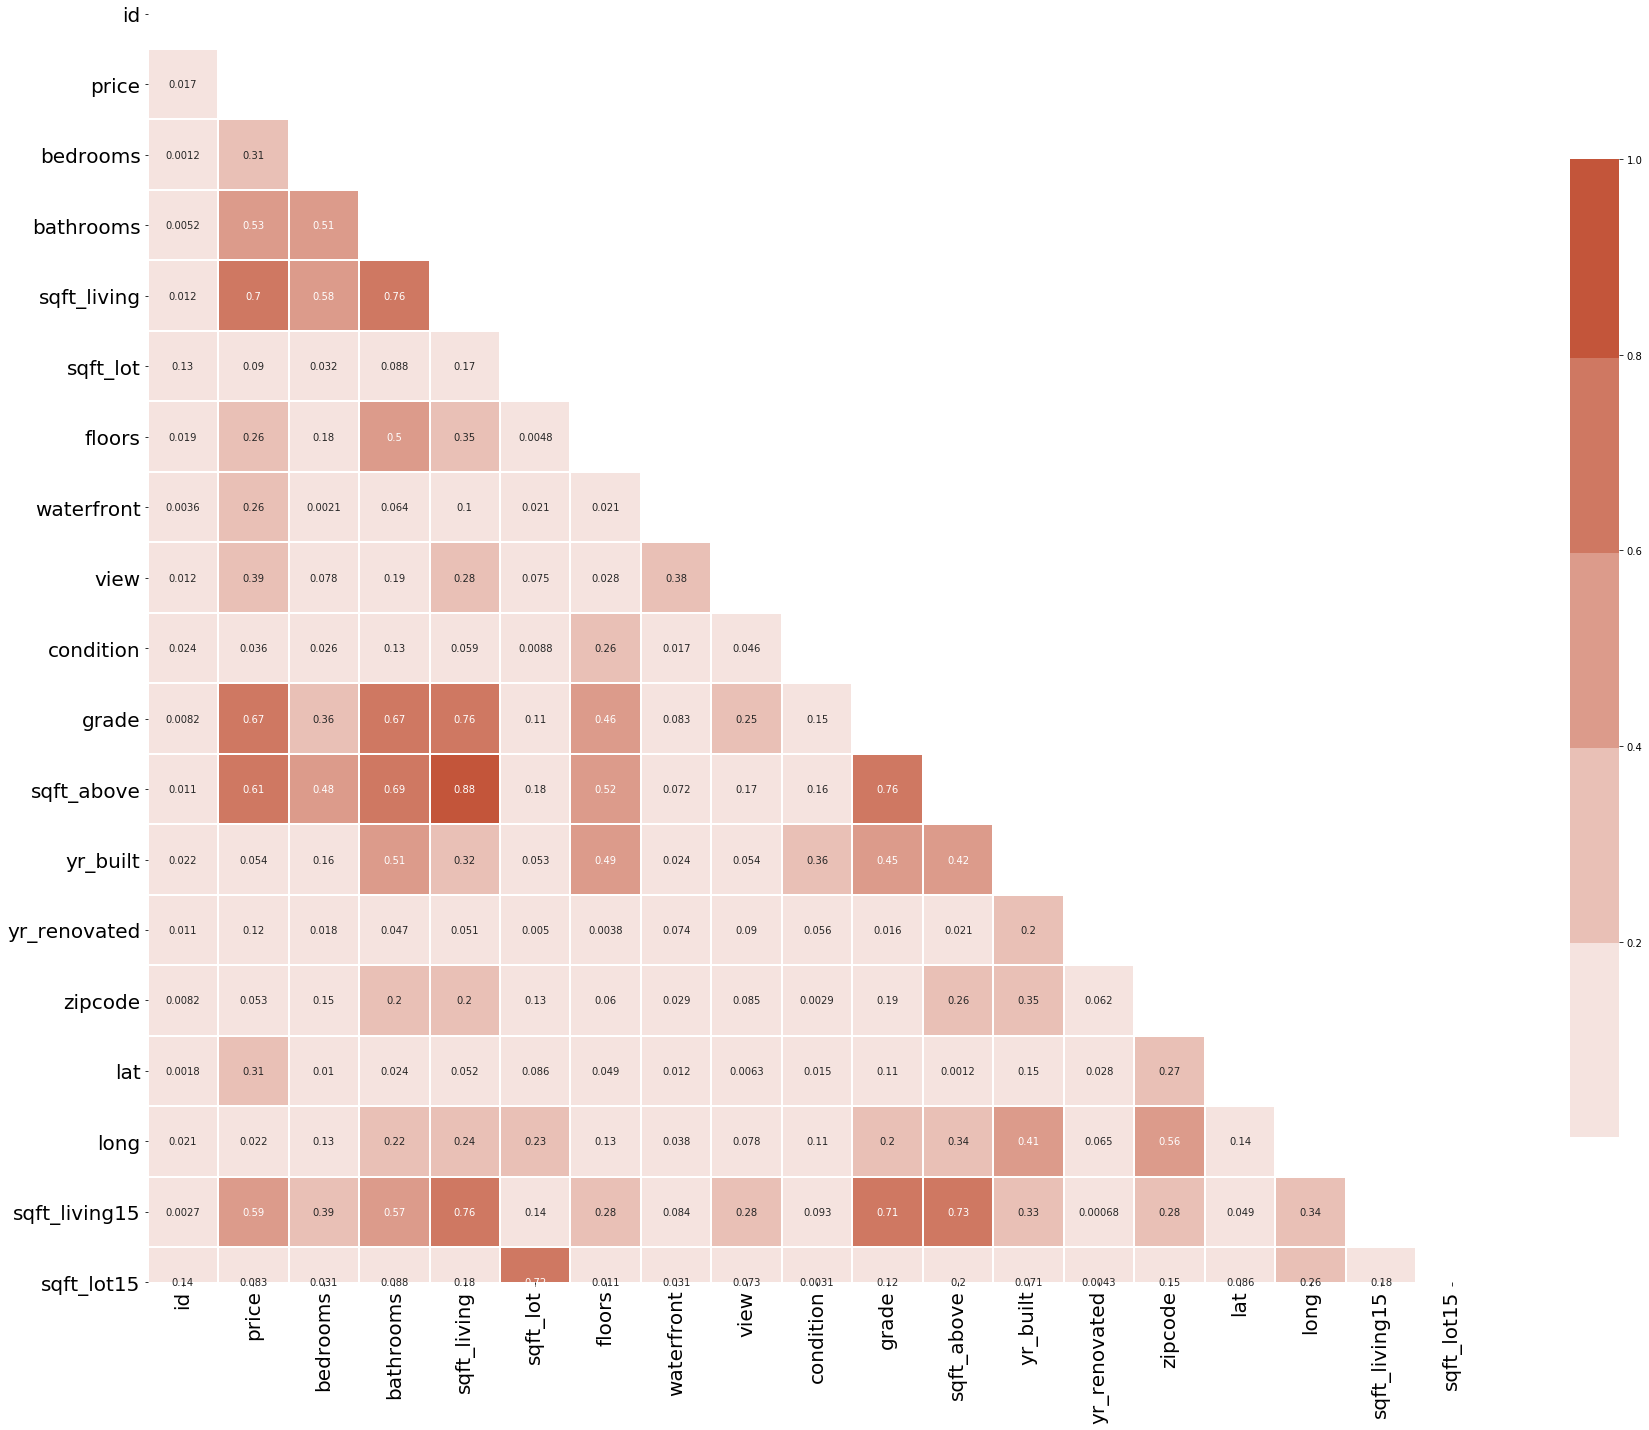

In [16]:
#Visually checking multicolinearity with a heat map 

plt.figure(figsize=(30,30))
plt.xticks(size=20)
plt.yticks(size=20)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask,k=0)] = True
sns.heatmap(df.corr().abs(),mask=mask,cmap=sns.diverging_palette(220, 20, n=10),
            annot=True,center=0,linewidths=1,
            square=True, cbar_kws={'shrink':0.6})

In [17]:
def color_red(val):
    """Created a function to apply red color to any values above .75"""
    color = 'red' if val > .75 else 'black'
    return 'color: %s' % color 


>**Apply correlation method to the data. Any values above .75 will be highlighted in red**

In [18]:
df.corr().abs().style.applymap(color_red)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.016772,0.001150,0.005162,0.012241,0.131911,0.018608,0.003599,0.011772,0.023803,0.008188,0.010799,0.021617,0.010612,0.008211,0.001798,0.020672,0.002701,0.138557
price,0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.154092,0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.126479,0.665838,0.686668,0.507173,0.047177,0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.059445,0.762779,0.876448,0.318152,0.051060,0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,0.004814,0.021459,0.075054,0.008830,0.114731,0.184139,0.052946,0.004979,0.129586,0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,0.004814,1.000000,0.020797,0.028414,0.264075,0.458794,0.523989,0.489193,0.003793,0.059541,0.049239,0.125943,0.280102,0.010722
waterfront,0.003599,0.264306,0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.024487,0.073939,0.028923,0.012157,0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.054452,0.090339,0.085059,0.006321,0.077702,0.278928,0.073083
condition,0.023803,0.036056,0.026496,0.126479,0.059445,0.008830,0.264075,0.016648,0.045622,1.000000,0.146896,0.158904,0.361592,0.055808,0.002888,0.015102,0.105877,0.093072,0.003126


>**Observations:**
* Strong correlation between sqft_living and bathrooms
* Strong correlation between sqft_living and grade
* Strong correlation between sqft_living and sqft_above 
* Strong correlation between sqft_living and sqft_living15
* Strong correlation between grade and sqft_above 

## Converting Datatypes

In [101]:
#Converting datatypes to appropriate date type
#converting categorical data to str

df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms'] = df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')
df['condition'] = df['condition'].astype('str')
df['grade'] = df['grade'].astype('str')
df['zipcode'] = df['zipcode'].astype('str')

#Converting values in view to either 1 or 0, then converting to a str

df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)
df['view'] = df['view'].astype('str')

#Converting values in yr_renovated to either 1 or 0, then converting to str

df['yr_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['yr_renovated'] = df['yr_renovated'].astype('str')

#converting continuous data to int

df['price'] = df['price'].astype('int')

#converting data from object>int, then converting value to either 1 or 0, converting back to str
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'] = df['sqft_basement'].astype('int')
df.sqft_basement = df.sqft_basement.map(lambda x: 1 if x > 0 else 0)
df['sqft_basement'] = df['sqft_basement'].astype('str')                                      

In [102]:
#Adding a column for age of house 
df['Age'] = 2020 - df['yr_built']

In [103]:
#Dropping the following columns 

#No linear relationship 
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

#Too many unique values 
df.drop('date', axis=1, inplace=True)

#Created a column 'Age' as a replacement
df.drop('yr_built', axis=1, inplace=True )

#Irrevalent column 
df.drop('id', axis=1, inplace=True)

In [104]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          21597 non-null  int64 
 1   bedrooms       21597 non-null  object
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  object
 7   view           21597 non-null  object
 8   condition      21597 non-null  object
 9   grade          21597 non-null  object
 10  sqft_above     21597 non-null  int64 
 11  sqft_basement  21597 non-null  object
 12  yr_renovated   21597 non-null  object
 13  zipcode        21597 non-null  object
 14  sqft_living15  21597 non-null  int64 
 15  sqft_lot15     21597 non-null  int64 
 16  Age            21597 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 2.8+ MB


# Explore Data

In [105]:
#Overlooking numerical data 
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1986.620318,12758.283512,49.000324
std,3.673681e+05,918.106125,4.141264e+04,827.759761,685.230472,27274.441950,29.375234
min,7.800000e+04,370.000000,5.200000e+02,370.000000,399.000000,651.000000,5.000000
25%,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1490.000000,5100.000000,23.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1840.000000,7620.000000,45.000000
75%,6.450000e+05,2550.000000,1.068500e+04,2210.000000,2360.000000,10083.000000,69.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,6210.000000,871200.000000,120.000000


>**Observations:**
* Contains extreme outliers 
* Age of houses range from 5 years to 120

## Visually Inspecting Target Variable -'Prices'

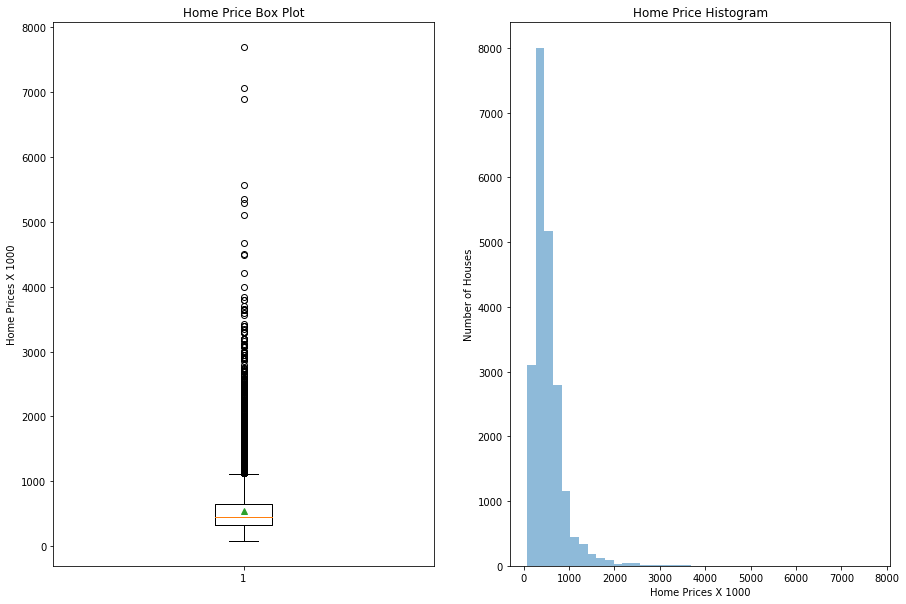

In [106]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.boxplot(df.price/1000, showmeans=True)
ax1.set_ylabel('Home Prices X 1000')
ax1.set_title('Home Price Box Plot')
ax2.hist(df.price/1000, bins=40, alpha=0.5)
ax2.set_ylabel('Number of Houses')
ax2.set_xlabel('Home Prices X 1000')
ax2.set_title('Home Price Histogram')
plt.show()

**Observations**

* Extreme outliers
* Positively skewed right 

## Check for Multicollinearity

In [107]:
#Removing target value 'price' and checking correlation among feats
data_pred = df.iloc[:,2:]
data_pred.corr().abs().style.applymap(color_red)

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age
sqft_living,1.000000,0.173453,0.876448,0.756402,0.184342,0.318152
sqft_lot,0.173453,1.000000,0.184139,0.144763,0.718204,0.052946
sqft_above,0.876448,0.184139,1.000000,0.731767,0.195077,0.424037
sqft_living15,0.756402,0.144763,0.731767,1.000000,0.183515,0.326377
sqft_lot15,0.184342,0.718204,0.195077,0.183515,1.000000,0.070777
Age,0.318152,0.052946,0.424037,0.326377,0.070777,1.000000


(7, -0.5)

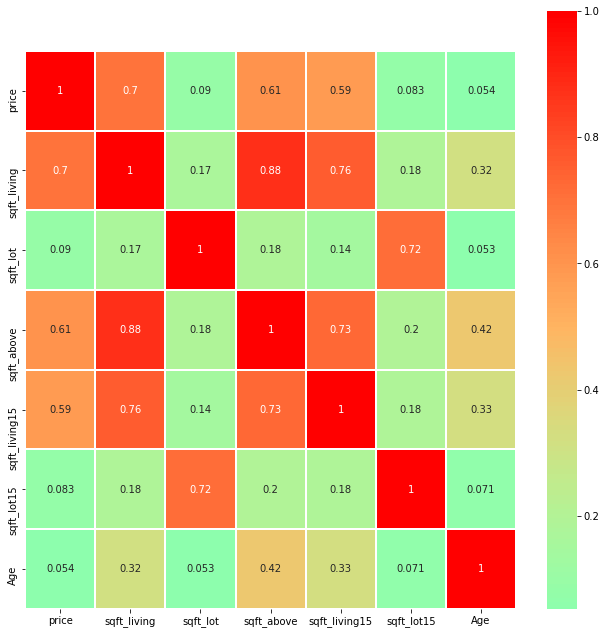

In [26]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1, cmap='rainbow');
ax.set_ylim(len(df.corr())-0, -0.5)

>**Observations:**
* Price and 'sqft_living have the strongest correlation.
* 'Sqft_living' has a strong correlation with 'sqft_above' and 'sqft_living15' which is indicated by a .75 or higher
* 'Sqft_lot and 'sqft_lot15 have a .72 correlation. 
* 'Sqft-above and 'sqft_living have a .73 correlation.


## Model 1: Most Original Data 

In [108]:
#Setting up variables for model fitting 
outcome = 'price'
df.columns = [col.replace('.', '_') for col in df.columns]
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age']

>**Create Function to run models**

In [109]:
def make_model(train_df, x_cols): 
    """Creating a function to contruct and run a model. The function will also create a qq plot and homoscedasticity check"""

    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=train_df).fit()
    display(model.summary())
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    fig = sm.graphics.qqplot(model.resid, stats.distributions.norm, fit=True, line='45', ax=ax[0])
    ax[0].set(title='QQ Plot')
    ax[1].scatter(x=model.predict(), y=model.resid)
    ax[1].axhline(0,color='k',zorder=-1)
    ax[1].set(ylabel='Residuals',title='Homoscedasticity Check', xlabel="Target Values")
    
    return model

>**Using the function I created to construct and run model 1**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     815.8
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:00:43   Log-Likelihood:            -2.8767e+05
No. Observations:               21597   AIC:                         5.756e+05
Df Residuals:                   21459   BIC:                         5.767e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.209e+04   8.08e+04      0.273      0.785   -1.36e+05     1.8e+05
bedrooms[T.10]     -3.247e+05   8.76e+04     -3.707      0.000   -4.96e+05   -1.53e+05
bedrooms[T.11]     -6.077e+04   1.49e+05     -0.408      0.683   -3.53e+05    2.31e+05
bedrooms[T.2]       6308.3016   1.14e+04      0.553      0.580    -1.6e+04    2.87e+04
bedrooms[T.3]       1.516e+04   1.14e+04      1.325      0.185   -7264.296    3.76e+04
bedrooms[T.33]      4.605e+04   1.49e+05      0.310      0.757   -2.45e+05    3.37e+05
bedrooms[T.4]       -786.6642   1.17e+04     -0.067      0.946   -2.37e+04    2.21e+04
bedrooms[T.5]       -1.57e+04   1.23e+04     -1.274      0.203   -3.98e+04    8446.035
bedrooms[T.6]      -4.761e+04    1.5e+04     -3.174      0.002    -7.7e+04   -1.82e+04
bedrooms[T.7]      -1.872e+05   2.75e+04     -6.813      0.000   -2.41e+05   -1.33e+05
bedrooms[T.8]      -5.873e+04   4.35e+04     -1.349      0.177   -1.44e+05    2.66e+04
bedrooms[T.9]       -1.69e+05   6.81e+04     -2.480      0.013   -3.03e+05   -3.54e+04
bathrooms[T.0.75]  -7019.0629   7.64e+04     -0.092      0.927   -1.57e+05    1.43e+05
bathrooms[T.1.0]    2.978e+04   7.42e+04      0.402      0.688   -1.16e+05    1.75e+05
bathrooms[T.1.25]  -5.644e+04   8.91e+04     -0.633      0.527   -2.31e+05    1.18e+05
bathrooms[T.1.5]     2.26e+04   7.43e+04      0.304      0.761   -1.23e+05    1.68e+05
bathrooms[T.1.75]   1.961e+04   7.42e+04      0.264      0.792   -1.26e+05    1.65e+05
bathrooms[T.2.0]    1.982e+04   7.42e+04      0.267      0.790   -1.26e+05    1.65e+05
bathrooms[T.2.25]   3.901e+04   7.43e+04      0.525      0.599   -1.07e+05    1.85e+05
bathrooms[T.2.5]    2.803e+04   7.42e+04      0.378      0.706   -1.17e+05    1.74e+05
bathrooms[T.2.75]   2.845e+04   7.43e+04      0.383      0.702   -1.17e+05    1.74e+05
bathrooms[T.3.0]    4.573e+04   7.44e+04      0.615      0.539      -1e+05    1.92e+05
bathrooms[T.3.25]   8.919e+04   7.45e+04      1.197      0.231   -5.69e+04    2.35e+05
bathrooms[T.3.5]    4.744e+04   7.45e+04      0.637      0.524   -9.86e+04    1.93e+05
bathrooms[T.3.75]   1.311e+05   7.53e+04      1.741      0.082   -1.65e+04    2.79e+05
bathrooms[T.4.0]     1.32e+05   7.55e+04      1.750      0.080   -1.59e+04     2.8e+05
bathrooms[T.4.25]   2.119e+05   7.63e+04      2.777      0.005    6.23e+04    3.61e+05
bathrooms[T.4.5]    1.496e+05   7.59e+04      1.970      0.049     734.223    2.98e+05
bathrooms[T.4.75]   4.074e+05   8.08e+04      5.042      0.000    2.49e+05    5.66e+05
bathrooms[T.5.0]    2.821e+05   8.13e+04      3.468      0.001    1.23e+05    4.41e+05
bathrooms[T.5.25]   2.534e+05   8.55e+04      2.964      0.003    8.58e+04    4.21e+05
bathrooms[T.5.5]    4.191e+05   8.89e+04      4.714      0.000    2.45e+05    5.93e+05
bathrooms[T.5.75]   3.161e+05   1.07e+

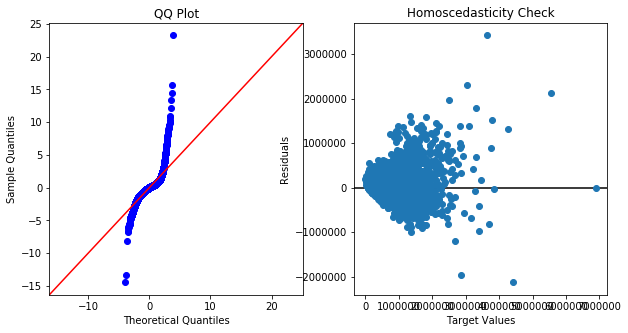

In [111]:
make_model(df, x_cols)

>**Observations:**
* The data has not been normalized and no outliers have been removed
* The first model yielded an R squared of .839
* The skew value of 2.383 suggests that the data distribution is highly skewed
* The kurtosis value of 42.8 indicates that the data distribution has heavy tails 
* The QQ plot shows us visually that we do not have normally distributed residuals and the tails have extreme values. 
* Homoscedasticity test shows hetroscedasticities and does not pass

## Log Transformation on Continuous Data 


In [112]:
#Creating a variable pulling all numeric columns 

num_cols = df.select_dtypes('number').columns

#Creating a for loop and applying log transformation to each column 
for feat in num_cols: 
    df[feat] = df[feat].map(lambda x: np.log(x))

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,12.309982,3,1.0,7.073270,8.639411,1.0,0.0,0,3,7,7.073270,0,0,98178,7.200425,8.639411,4.174387
1,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0,3,7,7.682482,1,1,98125,7.432484,8.941022,4.234107
2,12.100712,2,1.0,6.646391,9.210340,1.0,0.0,0,3,6,6.646391,0,0,98028,7.908387,8.994917,4.465908
3,13.311329,4,3.0,7.580700,8.517193,1.0,0.0,0,5,7,6.956545,1,0,98136,7.215240,8.517193,4.007333
4,13.142166,3,2.0,7.426549,8.997147,1.0,0.0,0,3,8,7.426549,0,0,98074,7.495542,8.923058,3.496508


## One-Hot Encoding for Categorical Data

In [113]:
#Create variable that holds categorical data
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_basement', 'yr_renovated',
            'zipcode']

#Perform one-hot encoding on categorical data
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first = True)

#Remove the orginal data from df
df_preprocessed = df.drop(cat_cols, axis=1)

#Concat df_pre with dummies 
df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

#Preview the results 
print(df_preprocessed.shape)
df_preprocessed.head()


(21597, 138)


,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309982,7.073270,8.639411,7.073270,7.200425,8.639411,4.174387,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,8.887653,7.682482,7.432484,8.941022,4.234107,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,9.210340,6.646391,7.908387,8.994917,4.465908,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,8.517193,6.956545,7.215240,8.517193,4.007333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8.997147,7.426549,7.495542,8.923058,3.496508,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Constructing Model

In [114]:
# Create train-test dataset for model validation
train, test = train_test_split(df_preprocessed, test_size=0.2)

# Check datasets
print(train.shape, test.shape)

(17277, 138) (4320, 138)


>**Define Model Data**

In [115]:
#Clean the column names 

train.columns = [col.replace('.', '_') for col in train.columns]

#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4

## Model 2: Log/Dummy Variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     981.9
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:02:01   Log-Likelihood:                 5420.9
No. Observations:               17277   AIC:                        -1.057e+04
Df Residuals:                   17139   BIC:                            -9495.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.6443      0.119     64.348      0.000       7.411       7.877
sqft_living         0.2611      0.014     18.553      0.000       0.234       0.289
sqft_lot            0.0745      0.004     18.412      0.000       0.067       0.082
sqft_above          0.1715      0.014     12.348      0.000       0.144       0.199
sqft_living15       0.1484      0.007     19.970      0.000       0.134       0.163
sqft_lot15         -0.0200      0.004     -4.536      0.000      -0.029      -0.011
Age                -0.0293      0.003     -8.741      0.000      -0.036      -0.023
bedrooms_10        -0.2747      0.106     -2.594      0.009      -0.482      -0.067
bedrooms_11         0.0954      0.179      0.533      0.594      -0.255       0.446
bedrooms_2         -0.0069      0.015     -0.449      0.654      -0.037       0.023
bedrooms_3         -0.0319      0.015     -2.063      0.039      -0.062      -0.002
bedrooms_33         0.0524      0.178      0.294      0.769      -0.297       0.402
bedrooms_4         -0.0337      0.016     -2.122      0.034      -0.065      -0.003
bedrooms_5         -0.0504      0.017     -3.009      0.003      -0.083      -0.018
bedrooms_6         -0.0753      0.020     -3.677      0.000      -0.115      -0.035
bedrooms_7         -0.2023      0.037     -5.404      0.000      -0.276      -0.129
bedrooms_8         -0.0578      0.057     -1.010      0.312      -0.170       0.054
bedrooms_9         -0.0847      0.091     -0.926      0.354      -0.264       0.095
bathrooms_0_75      0.1444      0.092      1.563      0.118      -0.037       0.326
bathrooms_1_0       0.1670      0.089      1.875      0.061      -0.008       0.342
bathrooms_1_25      0.1472      0.112      1.318      0.188      -0.072       0.366
bathrooms_1_5       0.1526      0.089      1.710      0.087      -0.022       0.328
bathrooms_1_75      0.1750      0.089      1.962      0.050       0.000       0.350
bathrooms_2_0       0.1744      0.089      1.954      0.051      -0.001       0.349
bathrooms_2_25      0.1888      0.089      2.116      0.034       0.014       0.364
bathrooms_2_5       0.1958      0.089      2.195      0.028       0.021       0.371
bathrooms_2_75      0.2103      0.089      2.353      0.019       0.035       0.386
bathrooms_3_0       0.2075      0.089      2.318      0.020       0.032       0.383
bathrooms_3_25      0.2335      0.090      2.605      0.009       0.058       0.409
bathrooms_3_5       0.2317      0.090      2.585      0.010       0.056       0.407
bathrooms_3_75      0.2735      0.091      3.013      0.003       0.096       0.451
bathrooms_4_0       0.2781      0.091      3.056      0.002       0.100       0.456
bathrooms_4_25      0.3168      0.092      3.431      0.001       0.136       0.498
bathrooms_4_5       0.2353      0.092      2.566      0.010

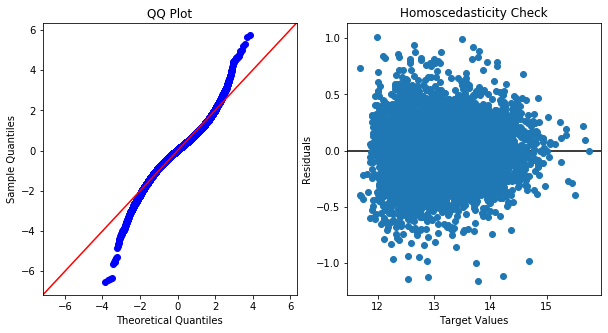

In [116]:
make_model(train, x_cols)

>**Observations:**
*  For Model 2, numeric data has been log transformed and dummy variables have been created for categorical data. 
* The 2nd Model yielded an R squared of .883
* The Skew level of -.260 shows that the data is symmetrical 
* The Kurtosis level of 6.093 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. 
* QQ plot has improved but there are still extreme outliers present
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


## Multicollinearity Check: VIF Method

In [117]:
#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#set up equation
X = train.drop('price', axis=1)
X = sm.add_constant(X)
X

,const,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,Age,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,condition_2,condition_3,condition_4,condition_5,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3465,1.0,7.390181,8.874868,7.154615,7.390181,8.843615,4.248495,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6187,1.0,7.426549,8.494129,7.073270,7.244228,8.496990,4.382027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17319,1.0,7.293018,7.440147,7.293018,7.229839,7.009409,2.708050,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7494,1.0,7.878534,9.613068,7.478735,8.083329,9.792779,4.510860,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3182,1.0,7.098376,8.389360,7.098376,7.610853,8.229511,4.499810,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13350,1.0,7.783

In [118]:
#VIF method over 6 is considered to be high 
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

const            7737.404904
sqft_living        19.421969
sqft_lot            7.267536
sqft_above         19.201712
sqft_living15       3.233578
                    ...     
zipcode_98177       1.767567
zipcode_98178       1.722029
zipcode_98188       1.376221
zipcode_98198       1.775768
zipcode_98199       1.998672
Length: 138, dtype: float64

In [119]:
#examining all columns with a vif value of over 6
threshold = 6
bad_vif = list(vif_results[vif_results>threshold].index)
bad_vif.remove('const')
bad_vif

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_lot15',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_7',
 'grade_8']

>**Observation:**
* After log transformation and creating dummy variables, we see the following columns have a high VIF which is anything over 6 


>**Dropping all columns with a high VIF and setting up variables for next model output**

In [120]:
train.drop(bad_vif, axis=1, inplace=True)
display(train.head())
#Define the Dependent Variable
outcome = 'price'

#Create the Columns List 
x_cols = list(train.columns)

#Remove the Dependent Variable 
x_cols.remove(outcome)

x_cols

,price,sqft_living15,Age,bedrooms_10,bedrooms_11,bedrooms_33,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_1_25,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_5,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,view_1,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_9,sqft_basement_1,yr_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3465,12.706848,7.390181,4.248495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6187,13.017003,7.244228,4.382027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17319,12.971540,7.229839,2.708050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7494,14.151983,8.083329,4.510860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3182,13.361380,7.610853,4.499810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['sqft_living15',
 'Age',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_1_25',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1_0',
 'view_1',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_9',
 'sqft_basement_1',
 'yr_renovated_1',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zi

## Model 3: + Multicollinearity Columns Removed 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     682.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:03:43   Log-Likelihood:                 981.14
No. Observations:               17277   AIC:                            -1744.
Df Residuals:                   17168   BIC:                            -898.8
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3715      0.062    135.957      0.000       8.251       8.492
sqft_living15       0.5497      0.008     69.744      0.000       0.534       0.565
Age                -0.0149      0.004     -4.072      0.000      -0.022      -0.008
bedrooms_10        -0.1724      0.135     -1.277      0.202      -0.437       0.092
bedrooms_11         0.2646      0.230      1.150      0.250      -0.186       0.715
bedrooms_33         0.2277      0.230      0.992      0.321      -0.222       0.678
bedrooms_6          0.0992      0.016      6.127      0.000       0.067       0.131
bedrooms_7          0.0175      0.043      0.404      0.686      -0.067       0.102
bedrooms_8          0.2147      0.071      3.044      0.002       0.076       0.353
bedrooms_9          0.0561      0.115      0.486      0.627      -0.170       0.282
bathrooms_1_25     -0.1385      0.087     -1.591      0.112      -0.309       0.032
bathrooms_4_75      0.2603      0.057      4.560      0.000       0.148       0.372
bathrooms_5_0       0.2505      0.058      4.295      0.000       0.136       0.365
bathrooms_5_25      0.1394      0.074      1.872      0.061      -0.007       0.285
bathrooms_5_5       0.3574      0.076      4.730      0.000       0.209       0.506
bathrooms_5_75      0.2252      0.119      1.894      0.058      -0.008       0.458
bathrooms_6_0       0.2059      0.098      2.103      0.035       0.014       0.398
bathrooms_6_25      0.2130      0.245      0.871      0.384      -0.266       0.692
bathrooms_6_5       0.4393      0.164      2.686      0.007       0.119       0.760
bathrooms_6_75     -0.0216      0.165     -0.131      0.896      -0.345       0.302
bathrooms_7_5      -0.0766      0.257     -0.298      0.766      -0.581       0.427
bathrooms_7_75      0.1803      0.247      0.730      0.465      -0.304       0.665
bathrooms_8_0       0.4241      0.171      2.479      0.013       0.089       0.760
floors_1_5          0.1066      0.007     15.720      0.000       0.093       0.120
floors_2_0          0.1086      0.005     20.179      0.000       0.098       0.119
floors_2_5          0.2040      0.021      9.779      0.000       0.163       0.245
floors_3_0          0.0049      0.013      0.373      0.709      -0.021       0.030
floors_3_5          0.1402      0.095      1.478      0.139      -0.046       0.326
waterfront_1_0      0.5934      0.023     25.579      0.000       0.548       0.639
view_1              0.1812      0.007     26.966      0.000       0.168       0.194
grade_11            0.4081      0.014     28.689      0.000       0.380       0.436
grade_12            0.5719      0.030     18.851      0.000       0.512       0.631
grade_13            0.8089      0.084      9.664      0.000       0.645       0.973
grade_3             0.1236      0.230      0.537      0.591

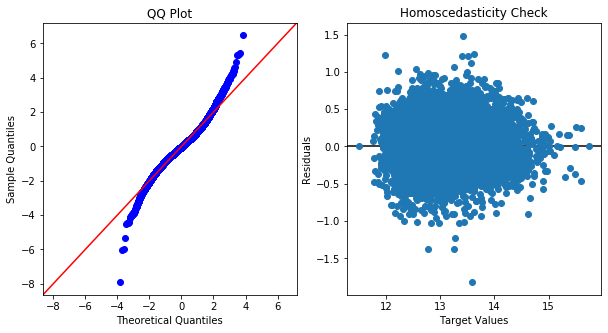

In [121]:
make_model(train, x_cols)


>**Observations:**
*  For Model 3, we observed the multicollinearity using the VIF method and removed any values higher than 6
* The 3rd Model yielded an R squared of .809 which is much lower than model 2
* The Skew level of .017 shows that the data is symmetrical and has improved from model 2
* The Kurtosis level of 5.348 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails. Small improvement from model 2
* QQ plot has improved but there are still extreme outliers present
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


## Model 4: Removing P-Values 

**Removing P-Values**

In [124]:
def remove_p(model, x_cols):
    """Creating a function to remove P-values larger than .05"""
    summary = model.summary()
    p_table = summary.tables[1]
    p_table = pd.DataFrame(p_table.data)
    p_table.columns = p_table.iloc[0]
    p_table = p_table.drop(0)
    p_table = p_table.set_index(p_table.columns[0])
    p_table['P>|t|'] = p_table['P>|t|'].astype(float)
    x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
    x_cols.remove('Intercept')
    number = print(len(p_table), len(x_cols))
    top_5 = print(x_cols[:5])
    table = display(p_table.head())
    
    return number, top_5, table

In [125]:
remove_p(model, x_cols)

87 84
['sqft_living15', 'Age', 'bedrooms_11', 'bedrooms_6', 'bedrooms_7']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.3387,0.067,123.987,0.0,8.207,8.471
sqft_living15,0.5557,0.009,62.793,0.0,0.538,0.573
Age,-0.0174,0.004,-4.765,0.0,-0.025,-0.010
bedrooms_11,7.151e-15,7.05e-16,10.141,0.0,5.77e-15,8.53e-15
bedrooms_6,0.0991,0.018,5.438,0.0,0.063,0.135


(None, None, None)

**Model 4 with Updates**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     682.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:11:42   Log-Likelihood:                 981.14
No. Observations:               17277   AIC:                            -1744.
Df Residuals:                   17168   BIC:                            -898.8
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3715      0.062    135.957      0.000       8.251       8.492
sqft_living15       0.5497      0.008     69.744      0.000       0.534       0.565
Age                -0.0149      0.004     -4.072      0.000      -0.022      -0.008
bedrooms_10        -0.1724      0.135     -1.277      0.202      -0.437       0.092
bedrooms_11         0.2646      0.230      1.150      0.250      -0.186       0.715
bedrooms_33         0.2277      0.230      0.992      0.321      -0.222       0.678
bedrooms_6          0.0992      0.016      6.127      0.000       0.067       0.131
bedrooms_7          0.0175      0.043      0.404      0.686      -0.067       0.102
bedrooms_8          0.2147      0.071      3.044      0.002       0.076       0.353
bedrooms_9          0.0561      0.115      0.486      0.627      -0.170       0.282
bathrooms_1_25     -0.1385      0.087     -1.591      0.112      -0.309       0.032
bathrooms_4_75      0.2603      0.057      4.560      0.000       0.148       0.372
bathrooms_5_0       0.2505      0.058      4.295      0.000       0.136       0.365
bathrooms_5_25      0.1394      0.074      1.872      0.061      -0.007       0.285
bathrooms_5_5       0.3574      0.076      4.730      0.000       0.209       0.506
bathrooms_5_75      0.2252      0.119      1.894      0.058      -0.008       0.458
bathrooms_6_0       0.2059      0.098      2.103      0.035       0.014       0.398
bathrooms_6_25      0.2130      0.245      0.871      0.384      -0.266       0.692
bathrooms_6_5       0.4393      0.164      2.686      0.007       0.119       0.760
bathrooms_6_75     -0.0216      0.165     -0.131      0.896      -0.345       0.302
bathrooms_7_5      -0.0766      0.257     -0.298      0.766      -0.581       0.427
bathrooms_7_75      0.1803      0.247      0.730      0.465      -0.304       0.665
bathrooms_8_0       0.4241      0.171      2.479      0.013       0.089       0.760
floors_1_5          0.1066      0.007     15.720      0.000       0.093       0.120
floors_2_0          0.1086      0.005     20.179      0.000       0.098       0.119
floors_2_5          0.2040      0.021      9.779      0.000       0.163       0.245
floors_3_0          0.0049      0.013      0.373      0.709      -0.021       0.030
floors_3_5          0.1402      0.095      1.478      0.139      -0.046       0.326
waterfront_1_0      0.5934      0.023     25.579      0.000       0.548       0.639
view_1              0.1812      0.007     26.966      0.000       0.168       0.194
grade_11            0.4081      0.014     28.689      0.000       0.380       0.436
grade_12            0.5719      0.030     18.851      0.000       0.512       0.631
grade_13            0.8089      0.084      9.664      0.000       0.645       0.973
grade_3             0.1236      0.230      0.537      0.591

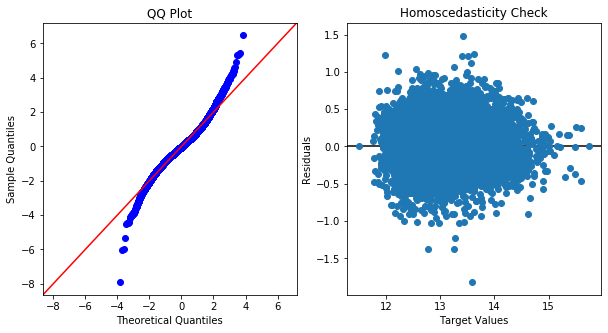

In [126]:
make_model(train, x_cols)


>**Observations:**
*  For Model 4, we removed p-values over .05
* The 4th Model yielded an R squared of .808 which is an improvement from model 3
* The Skew level of .016 shows that the data is symmetrical and is an improvement from model 3 
* The Kurtosis level of 5.336 is greater than 3 which is a  leptokurtic distribution. This type of distribution has longer and fatter tails and is an improvement fro model 3
* QQ plot has improved but there are still extreme outliers present
* The plot shows no obvious cone shape pattern overall. Homoscedasticity assumption holds.


In [128]:
#model validation
from sklearn.model_selection import train_test_split 
train_df, test_df = train_test_split(train, test_size=.2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     860.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:19:24   Log-Likelihood:                 796.10
No. Observations:               17277   AIC:                            -1422.
Df Residuals:                   17192   BIC:                            -762.8
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3456      0.060    138.851      0.000       8.228       8.463
sqft_living15       0.5542      0.008     70.053      0.000       0.539       0.570
Age                -0.0165      0.003     -5.038      0.000      -0.023      -0.010
bedrooms_11     -2.306e-14   9.18e-16    -25.102      0.000   -2.49e-14   -2.13e-14
bedrooms_6          0.1158      0.016      7.293      0.000       0.085       0.147
bedrooms_7          0.0939      0.039      2.382      0.017       0.017       0.171
bathrooms_5_5       0.2218      0.085      2.615      0.009       0.056       0.388
bathrooms_6_0       0.3741      0.107      3.508      0.000       0.165       0.583
bathrooms_6_25   5.812e-14   2.03e-15     28.685      0.000    5.42e-14    6.21e-14
bathrooms_6_5       0.4054      0.165      2.455      0.014       0.082       0.729
floors_1_5          0.1070      0.007     15.817      0.000       0.094       0.120
floors_2_0          0.1087      0.005     21.720      0.000       0.099       0.119
floors_2_5          0.2096      0.020     10.243      0.000       0.169       0.250
waterfront_1_0      0.5893      0.023     26.055      0.000       0.545       0.634
view_1              0.1862      0.007     27.645      0.000       0.173       0.199
grade_11            0.4134      0.014     29.610      0.000       0.386       0.441
grade_12            0.6343      0.030     21.204      0.000       0.576       0.693
grade_13            0.9449      0.076     12.412      0.000       0.796       1.094
grade_4            -0.4442      0.052     -8.520      0.000      -0.546      -0.342
grade_5            -0.2895      0.017    -16.771      0.000      -0.323      -0.256
grade_6            -0.1460      0.007    -21.236      0.000      -0.159      -0.132
grade_9             0.1471      0.006     24.372      0.000       0.135       0.159
sqft_basement_1     0.0719      0.004     17.454      0.000       0.064       0.080
yr_renovated_1      0.1209      0.010     12.223      0.000       0.102       0.140
zipcode_98004       1.1685      0.016     73.766      0.000       1.137       1.200
zipcode_98005       0.7776      0.021     36.877      0.000       0.736       0.819
zipcode_98006       0.6620      0.013     50.320      0.000       0.636       0.688
zipcode_98007       0.6761      0.022     30.586      0.000       0.633       0.719
zipcode_98008       0.6653      0.017     39.403      0.000       0.632       0.698
zipcode_98010       0.3282      0.027     12.190      0.000       0.275       0.381
zipcode_98011       0.4061      0.020     20.809      0.000       0.368       0.444
zipcode_98014       0.3799      0.024     16.016      0.000       0.333       0.426
zipcode_98019       0.2846      0.020     14.281      0.000       0.246       0.324
zipcode_98022       0.0995      0.018      5.441      0.000

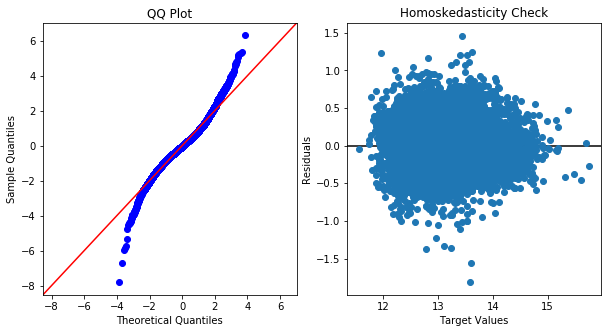

In [86]:
make_model(train, x_cols)

In [131]:
from sklearn.metrics import r2_score
train_pred = model.predict(train_df)
test_pred = model.predict(test_df)

In [132]:
r2_train = r2_score(train_df['price'], train_pred)
r2_test = r2_score(test_df['price'], test_pred)

In [133]:
r2_train, r2_test

(0.8112341986304534, 0.8006298155966062)

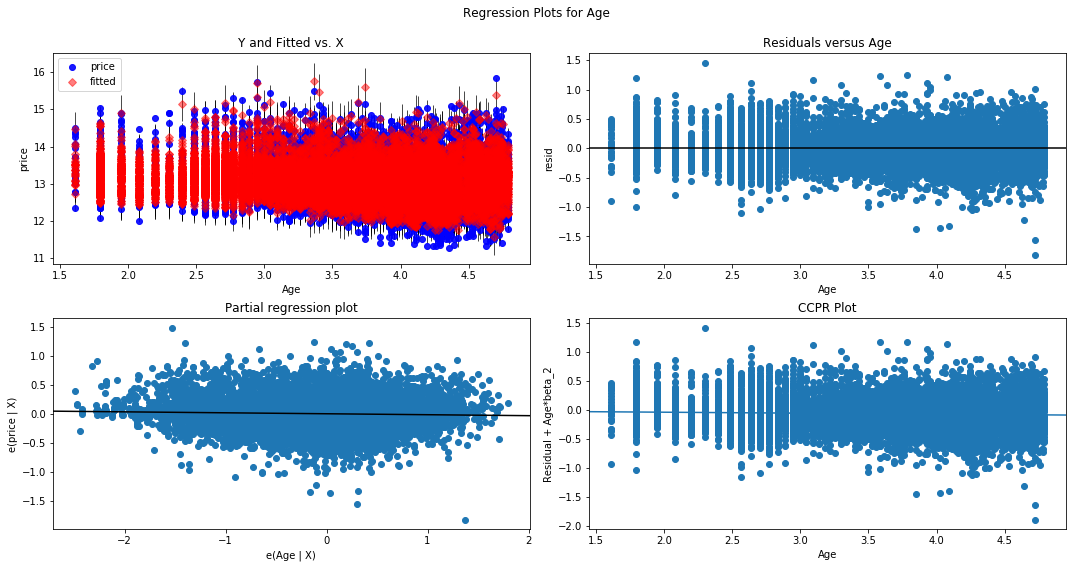

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

In [134]:
#intrepretations

In [135]:
#conclusions 